### German Credit Analysis | A risk Perspective

Goals for this Project
Explore our data and detecting key patterns.
Develop a Neural Network to predict whether a loan will be of a good or bad risk.

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")
import os
import pandas_profiling
print(os.listdir('../data-scientist-job-market-in-the-us/'))

['fulltimeLA.csv', 'fulltimeCHI.csv', 'fulltimeNY.csv', 'fulltimeBO.csv', 'fulltimeAT.csv', 'fulltimeMA.csv', 'fulltimeMV.csv', 'alldata.csv', 'data_science_market.ipynb', 'fulltimeSU.csv', 'fulltimeSF.csv', 'fulltimeSEA.csv', 'fulltimeSD.csv', 'fulltimeRM.csv', 'fulltimeDC.csv', 'ds.ipynb', '.ipynb_checkpoints', 'fulltimeAL.csv', 'fulltimeBOS.csv']


In [72]:
df = pd.read_csv('german_credit_data.csv', index_col=0)

In [73]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [74]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
age                 1000 non-null int64
sex                 1000 non-null object
job                 1000 non-null int64
housing             1000 non-null object
saving_accounts     817 non-null object
checking_account    606 non-null object
credit_amount       1000 non-null int64
duration            1000 non-null int64
purpose             1000 non-null object
risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [76]:
count = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/len(df)).sort_values(ascending=False)

In [77]:
filtered_file = pd.concat([count, percent], axis=1, keys = ['Count_missing', 'Percent missing'])

In [78]:
len(filtered_file[filtered_file['Percent missing'] >= 25])

1

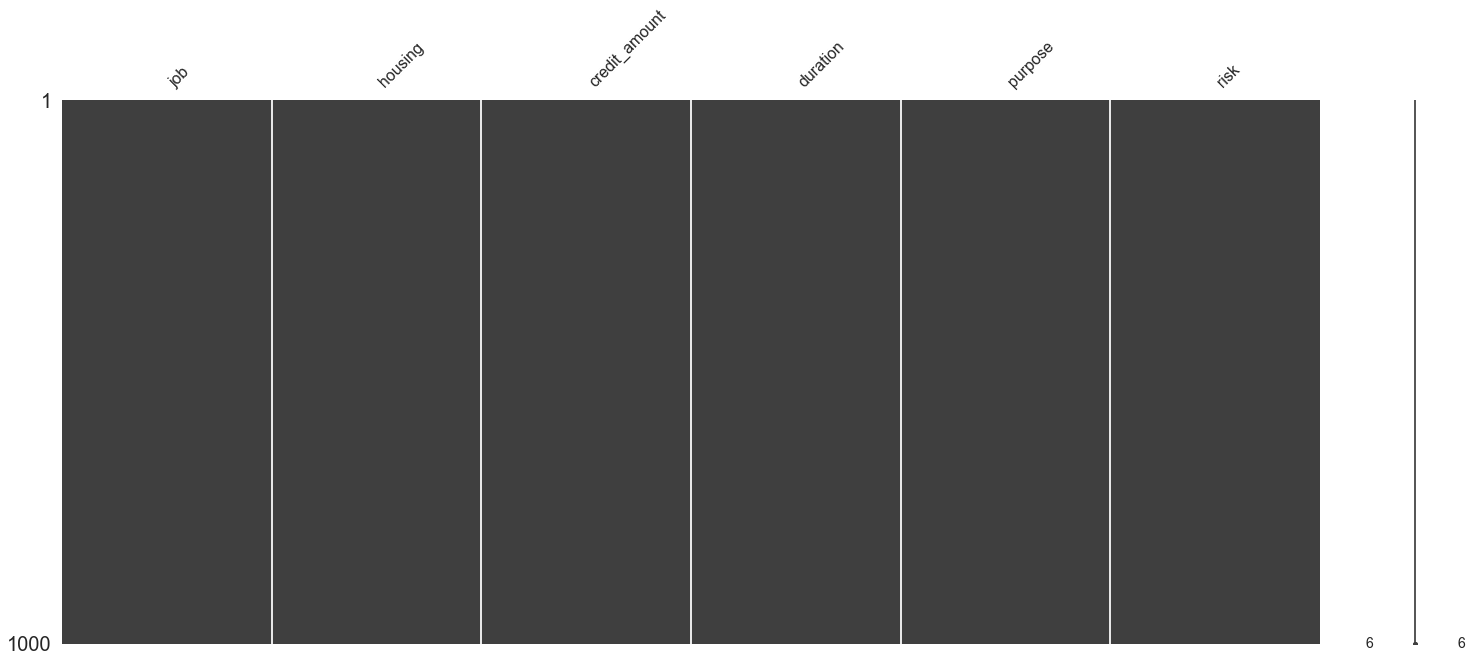

In [79]:
msno.matrix(msno.nullity_filter(df, filter='top', n=6, p=.15))

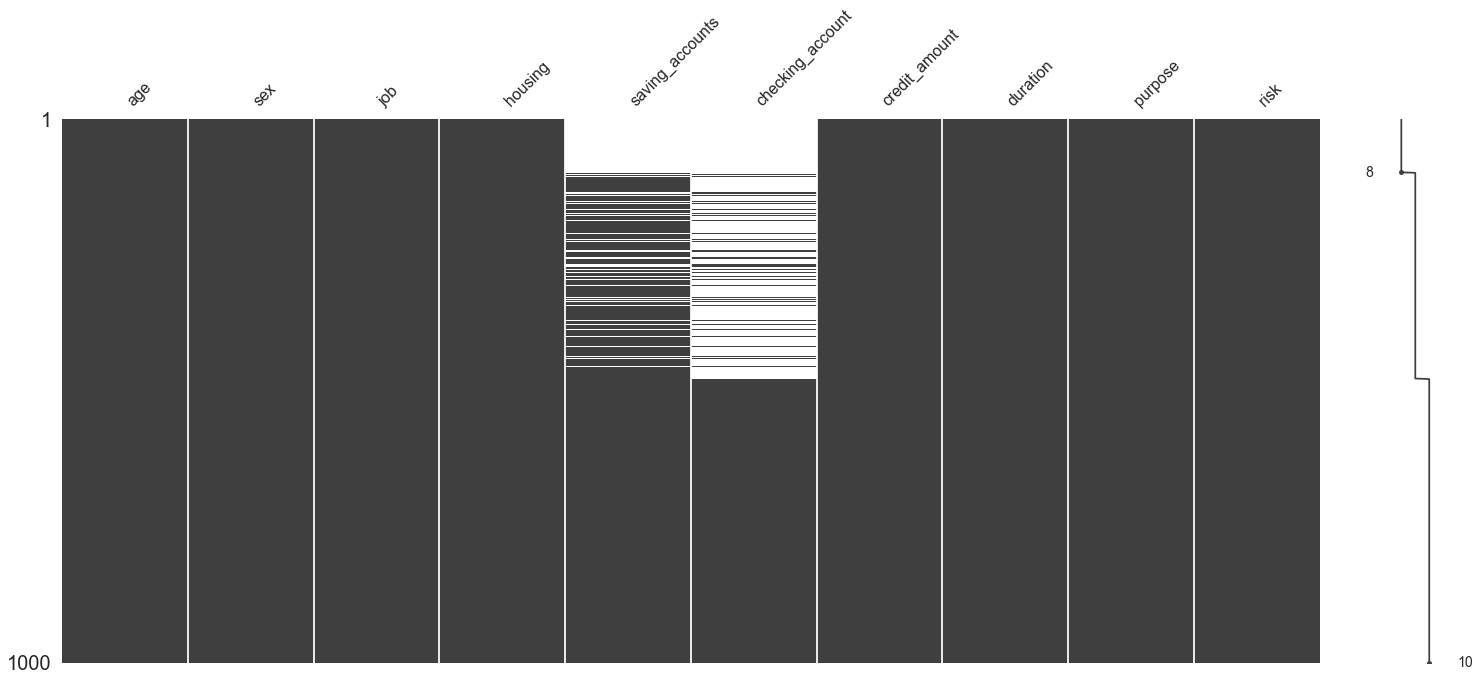

In [80]:
msno.matrix(df, sort='ascending')

In [58]:
df['checking_account'].value_counts()

little      274
moderate    269
rich         63
Name: checking_account, dtype: int64

In [60]:
df['saving_accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: saving_accounts, dtype: int64

In [84]:
df_1 = df

In [88]:
df.describe(include='all')

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


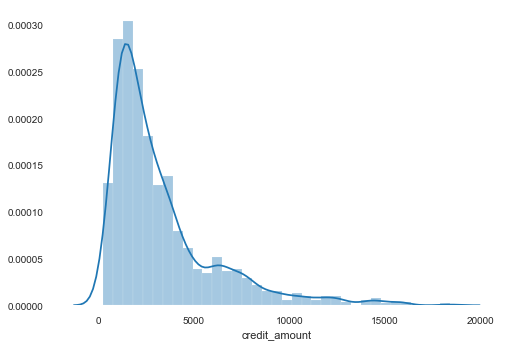

In [87]:
sns.distplot(df['credit_amount'])

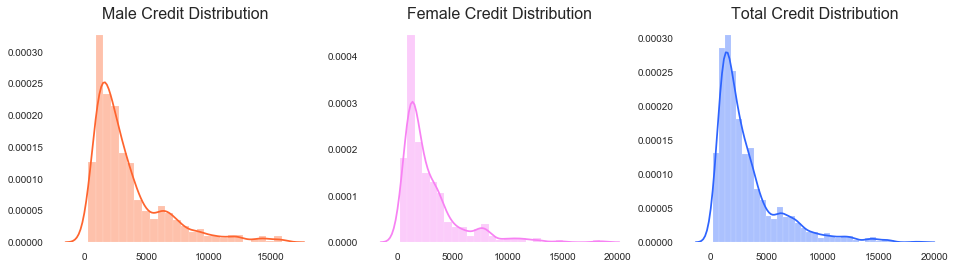

In [97]:
# Distibution of Credit_Amount for each Gender
male_credit = df['credit_amount'].loc[df['sex']=='male'].values
female_credit = df['credit_amount'].loc[df['sex'] == 'female'].values
total_credit = df['credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

In [96]:
df['credit_amount'].loc[df['sex']=='Male'].values

array([], dtype=int64)

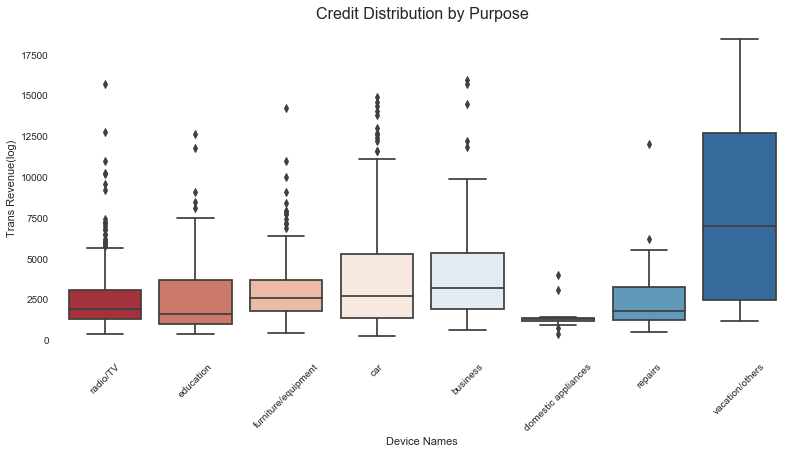

In [101]:
plt.figure(figsize=(13,6)) # figure size
g = sns.boxplot(x='purpose', y='credit_amount', data=df, palette='RdBu')

g.set_title('Credit Distribution by Purpose', fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_xlabel('Device Names')
g.set_ylabel('Trans Revenue(log)')
plt.show()

#### Analysis by Group:

Gender Analysis:
In this section analyze the gender section of our dataset.

Objectives:

Find the distribution of genders in our dataset.

See the distribution o each gender by the age (For instance, we have a higher number of young males than younger females)

What were the main application reasons for a credit loan? 

Does it vary by Gender?

How many jobs does each gender have? How many are Unemployed?

In [115]:
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go

by_age = df['age'].values.tolist()
male_age = df['age'].loc[df['sex'] == 'male'].values.tolist()
female_age = df['age'].loc[df['sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [114]:
df['purpose'].unique()
sex_purpose = pd.crosstab(df['purpose'] , df['sex']).apply(lambda x: x/x.sum()*100)
sex_purpose

sex,female,male
purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [116]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']